In [ ]:
# import os
# import torchaudio
# from torchaudio.transforms import Resample

# def resample_audio_recursive(input_folder, output_folder, target_sample_rate=16000):
#     # Create output folder if it doesn't exist
#     os.makedirs(output_folder, exist_ok=True)

#     # Recursively iterate through all files in the input folder and its subdirectories
#     for root, dirs, files in os.walk(input_folder):
#         for filename in files:
#             if filename.endswith(".wav"):
#                 file_path = os.path.join(root, filename)

#                 # Load the audio file
#                 waveform, original_sample_rate = torchaudio.load(file_path)

#                 # Resample to the target sample rate
#                 resampler = Resample(original_sample_rate, target_sample_rate)
#                 resampled_waveform = resampler(waveform)

#                 # Create output subdirectories if they don't exist
#                 relative_path = os.path.relpath(file_path, input_folder)
#                 output_subfolder = os.path.join(output_folder, os.path.dirname(relative_path))
#                 os.makedirs(output_subfolder, exist_ok=True)

#                 # Save the resampled audio to the output folder
#                 output_path = os.path.join(output_subfolder, filename)
#                 torchaudio.save(output_path, resampled_waveform, sample_rate=target_sample_rate)

# # Specify your input and output folders
# input_folder = "/content/drive/MyDrive/wav_files"
# output_folder = "/content/drive/MyDrive/resampled_wav"

# # Resample the entire dataset
# resample_audio_recursive(input_folder, output_folder)

In [ ]:
!pip install omegaconf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=1783e8c9df97718b7c6c8a62974042e43efcee41a59685182807c56118f80183
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


In [ ]:
import torch
import torchaudio
import os
import pandas as pd
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import random

model, decoder, utils = torch.hub.load(repo_or_dir='snakers4/silero-models',
                                       model='silero_stt',
                                       source='github',
                                       language='en',  # specify the language
                                       device='cpu')  # can be 'cuda' for GPU
(read_batch, split_into_batches,
 read_audio, prepare_model_input) = utils


/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/snakers4/silero-models/zipball/master" to /root/.cache/torch/hub/master.zip
100%|██████████| 112M/112M [00:05<00:00, 23.4MB/s]


# Using resampled audio data

In [ ]:
file_name = "/content/drive/MyDrive/resampled_wav/01/9_01_14.wav"

waveform, sample_rate = torchaudio.load(file_name)

audio = waveform

min_length = 16000
if audio.shape[1] < min_length:
    padding_size = min_length - audio.shape[1]
    audio = torch.nn.functional.pad(audio, (0, padding_size), mode='constant', value=0.0)


output = model(audio)


for example in output:
    print(decoder(example.cpu()))


nine


In [ ]:
parent_directory = '/content/drive/MyDrive/resampled_wav'
folders = [f for f in os.listdir(parent_directory) if os.path.isdir(os.path.join(parent_directory, f))]

all_wav_files = []

for folder in folders:
    folder_path = os.path.join(parent_directory, folder)
    wav_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.wav')]
    all_wav_files.extend(wav_files)

In [ ]:
data = pd.DataFrame({'file_paths': all_wav_files})
data

file_paths
0      /content/drive/MyDrive/resampled_wav/56/2_56_0...
1      /content/drive/MyDrive/resampled_wav/56/1_56_4...
2      /content/drive/MyDrive/resampled_wav/56/0_56_3...
3      /content/drive/MyDrive/resampled_wav/56/1_56_4...
4      /content/drive/MyDrive/resampled_wav/56/0_56_3...
...                                                  ...
29995  /content/drive/MyDrive/resampled_wav/50/7_50_3...
29996  /content/drive/MyDrive/resampled_wav/50/7_50_4...
29997  /content/drive/MyDrive/resampled_wav/50/9_50_3...
29998  /content/drive/MyDrive/resampled_wav/50/9_50_4...
29999  /content/drive/MyDrive/resampled_wav/50/9_50_3...

[30000 rows x 1 columns]

In [ ]:
rename = []
for i in range(data['file_paths'].size):
  file_path = data['file_paths'][i]
  rename.append(file_path[40])

data['actual_labels'] = rename
data

file_paths actual_labels
0      /content/drive/MyDrive/resampled_wav/56/2_56_0...             2
1      /content/drive/MyDrive/resampled_wav/56/1_56_4...             1
2      /content/drive/MyDrive/resampled_wav/56/0_56_3...             0
3      /content/drive/MyDrive/resampled_wav/56/1_56_4...             1
4      /content/drive/MyDrive/resampled_wav/56/0_56_3...             0
...                                                  ...           ...
29995  /content/drive/MyDrive/resampled_wav/50/7_50_3...             7
29996  /content/drive/MyDrive/resampled_wav/50/7_50_4...             7
29997  /content/drive/MyDrive/resampled_wav/50/9_50_3...             9
29998  /content/drive/MyDrive/resampled_wav/50/9_50_4...             9
29999  /content/drive/MyDrive/resampled_wav/50/9_50_3...             9

[30000 rows x 2 columns]

In [ ]:
data_samples = data.sample(n=1000, random_state=42)
data_samples.reset_index(drop=True, inplace=True)
data_samples

file_paths actual_labels
0    /content/drive/MyDrive/resampled_wav/59/5_59_3...             5
1    /content/drive/MyDrive/resampled_wav/47/7_47_0...             7
2    /content/drive/MyDrive/resampled_wav/42/7_42_3...             7
3    /content/drive/MyDrive/resampled_wav/44/1_44_3...             1
4    /content/drive/MyDrive/resampled_wav/02/3_02_2...             3
..                                                 ...           ...
995  /content/drive/MyDrive/resampled_wav/05/6_05_2...             6
996  /content/drive/MyDrive/resampled_wav/46/1_46_2...             1
997  /content/drive/MyDrive/resampled_wav/58/1_58_7...             1
998  /content/drive/MyDrive/resampled_wav/24/4_24_3...             4
999  /content/drive/MyDrive/resampled_wav/41/8_41_6...             8

[1000 rows x 2 columns]

In [ ]:
def convert_to_standard_format(predicted_text):
    digit_mapping = {
    "zero" : "0",
    "one" : "1",
    "two" : "2",
    "three" : "3",
    "four" : "4",
    "five" : "5",
    "six" : "6",
    "seven" : "7",
    "eight" : "8",
    "nine" : "9"
}

    tokens = predicted_text.split()


    modified_tokens = [digit_mapping[token] if token in digit_mapping else token for token in tokens]


    final_output = " ".join(modified_tokens)
    return final_output

In [ ]:
corrected_words = {
    "for" : "four",
    "to" : "two",
    "too" : "two"
}


correct_labels = []
predicted_labels = []
misclassified_indices = []

for i in range(len(data_samples)):
    filename = data_samples['file_paths'][i]

    correct_labels.append(data_samples['actual_labels'][i])

    waveform, sample_rate = torchaudio.load(filename)
    audio = waveform
    if audio.shape[1] < 16000:
        padding_size = 16000 - audio.shape[1]
        audio = torch.nn.functional.pad(audio, (0, padding_size), mode='constant', value=0.0)


    output = model(audio)
    transcription = ""
    for example in output:
        transcription += decoder(example.cpu())


    predicted_label = transcription.strip()
    if(predicted_label in corrected_words):
      predicted_label = corrected_words[predicted_label]
    predicted_label = convert_to_standard_format(predicted_label)
    predicted_labels.append(predicted_label)
    if predicted_label != correct_labels[i]:
        misclassified_indices.append(i)

correct_predictions = sum([pred == true for pred, true in zip(predicted_labels, correct_labels)])
accuracy = correct_predictions / len(correct_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.10%


In [ ]:
misclassified_indices

[26,
 27,
 49,
 57,
 85,
 98,
 132,
 142,
 144,
 164,
 165,
 170,
 172,
 198,
 216,
 231,
 271,
 277,
 284,
 285,
 296,
 303,
 307,
 310,
 316,
 322,
 331,
 363,
 376,
 396,
 398,
 405,
 410,
 425,
 449,
 457,
 482,
 483,
 506,
 517,
 544,
 548,
 551,
 568,
 597,
 628,
 631,
 641,
 646,
 705,
 751,
 754,
 757,
 798,
 822,
 827,
 849,
 889,
 983]

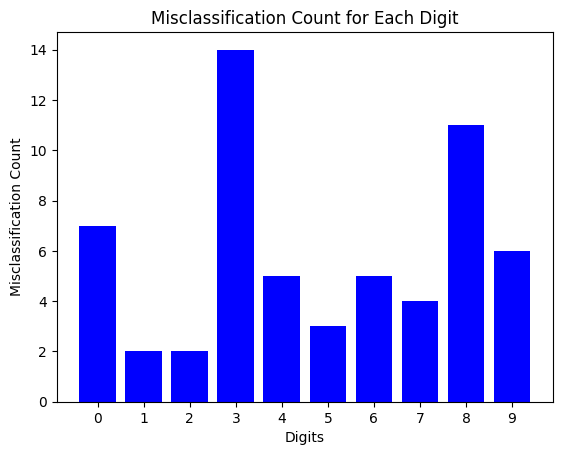

In [ ]:
misclassification_counts = {str(i): 0 for i in range(10)}

for i in misclassified_indices:
    true_label = correct_labels[i]
    misclassification_counts[true_label] += 1


digits = list(misclassification_counts.keys())
counts = list(misclassification_counts.values())

plt.bar(digits, counts, color='blue')
plt.xlabel('Digits')
plt.ylabel('Misclassification Count')
plt.title('Misclassification Count for Each Digit')
plt.show()


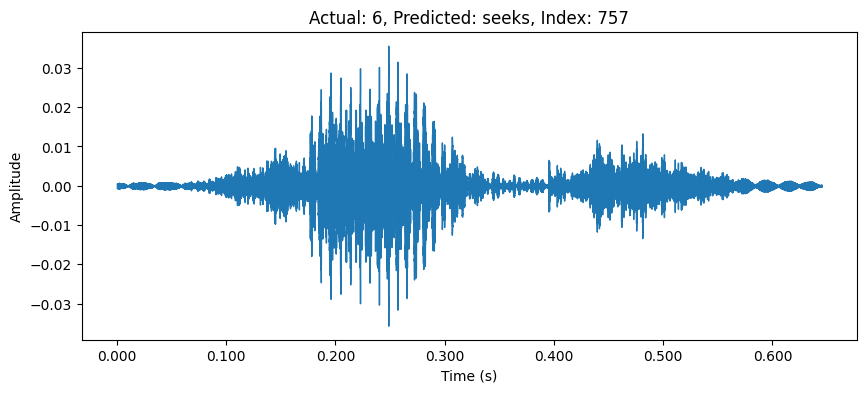

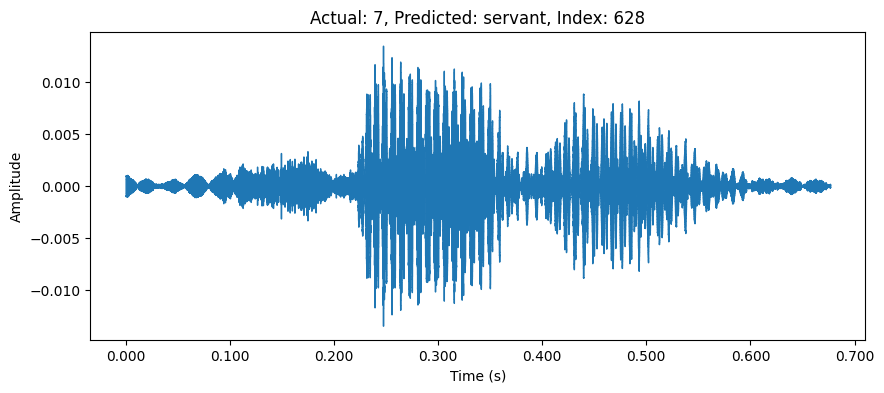

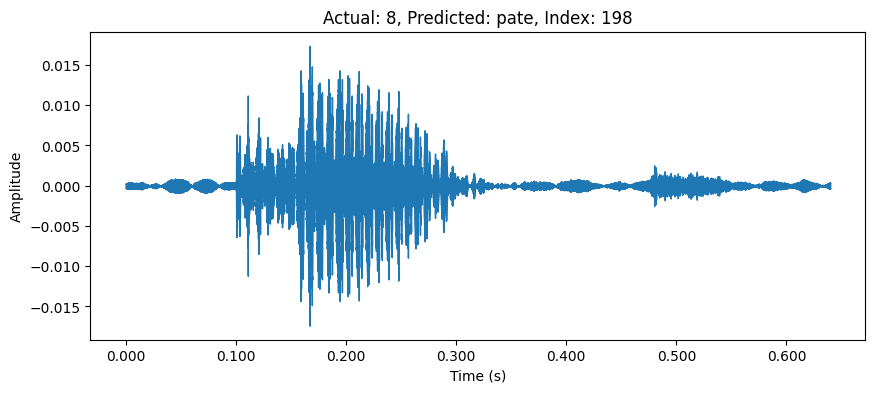

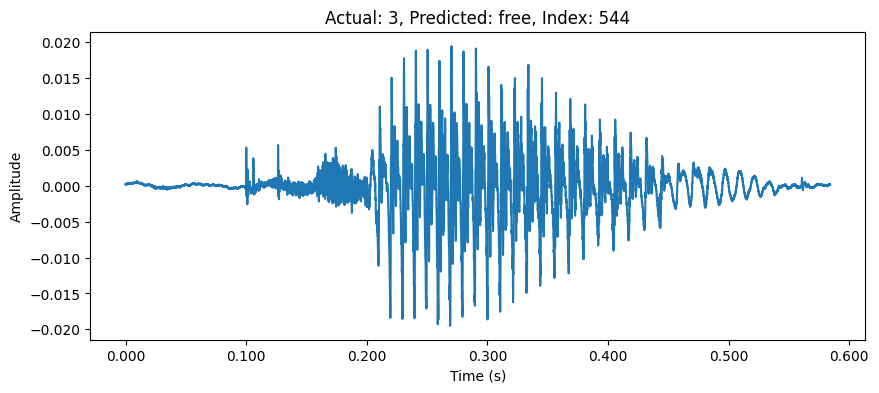

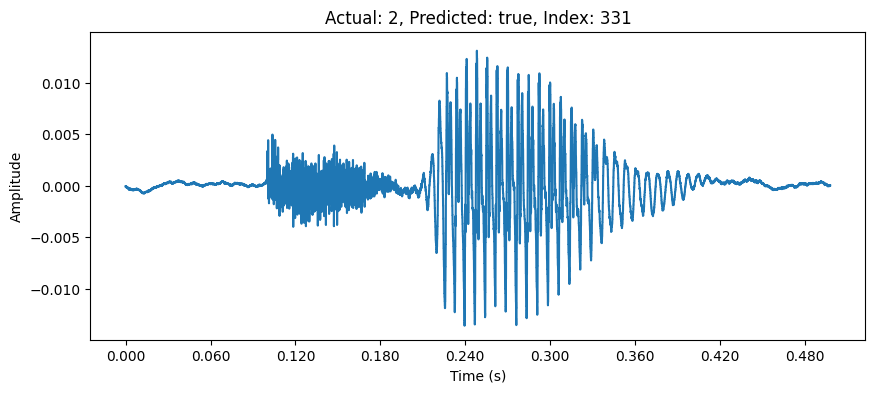

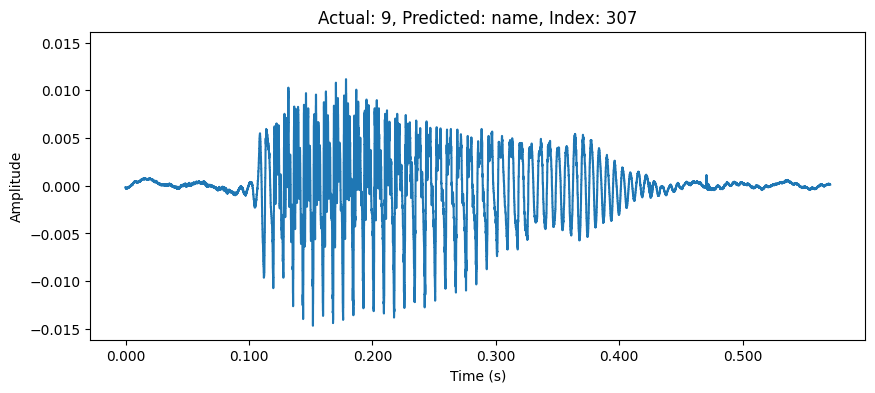

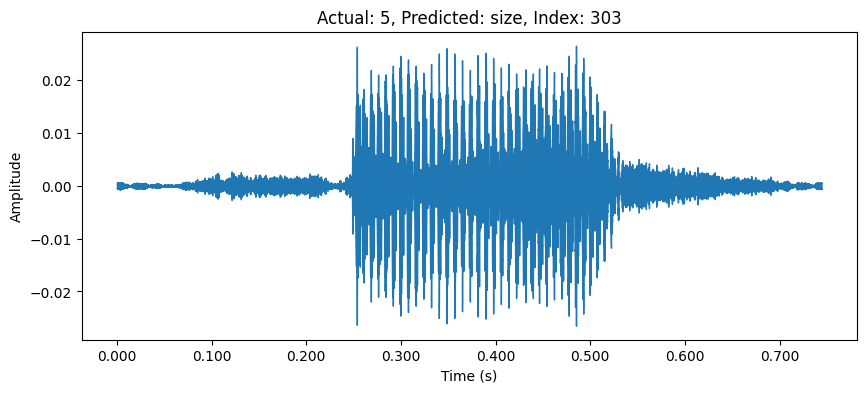

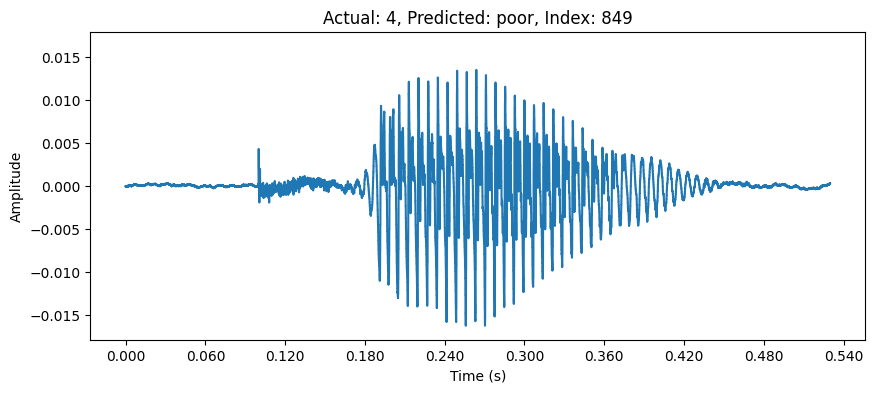

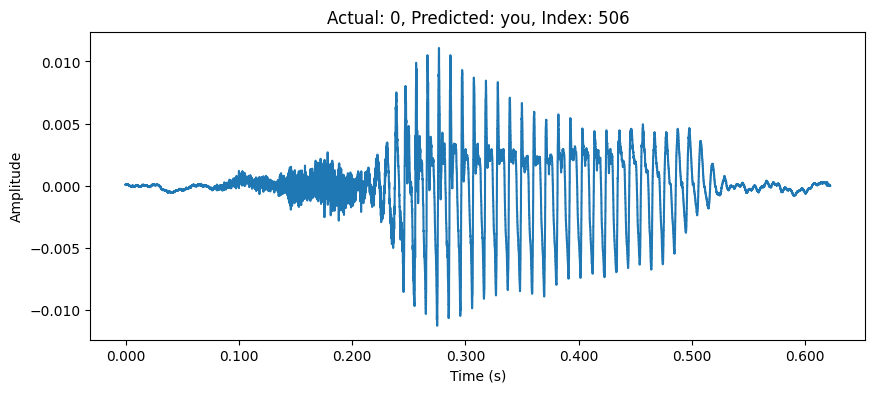

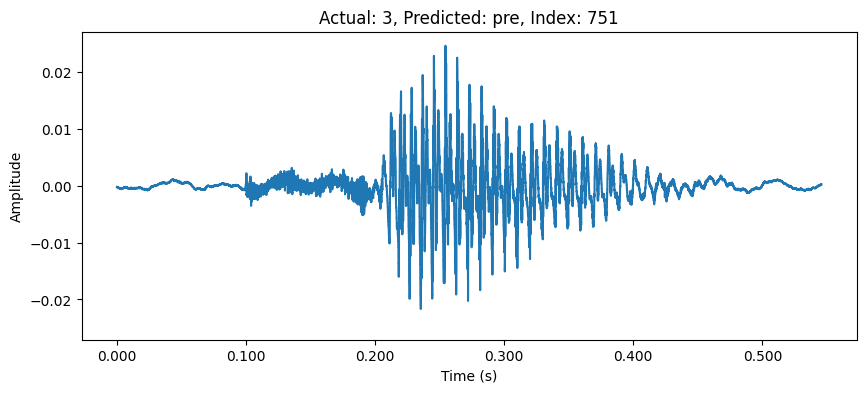

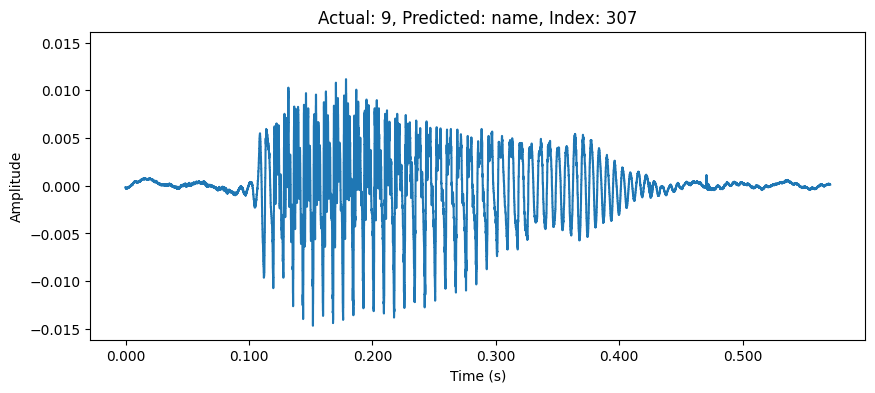

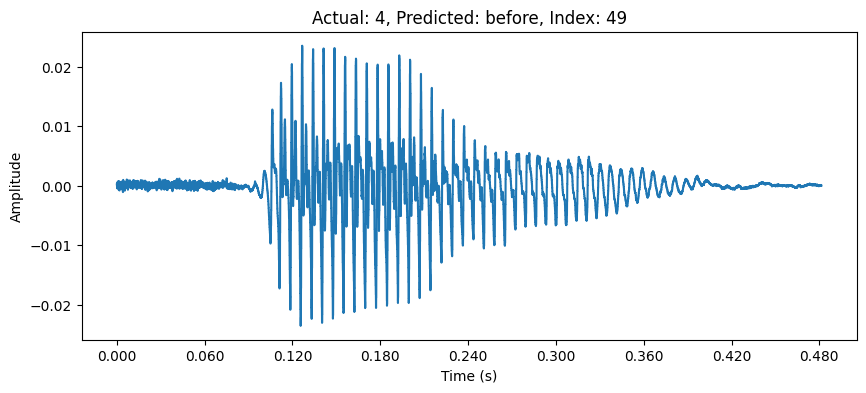

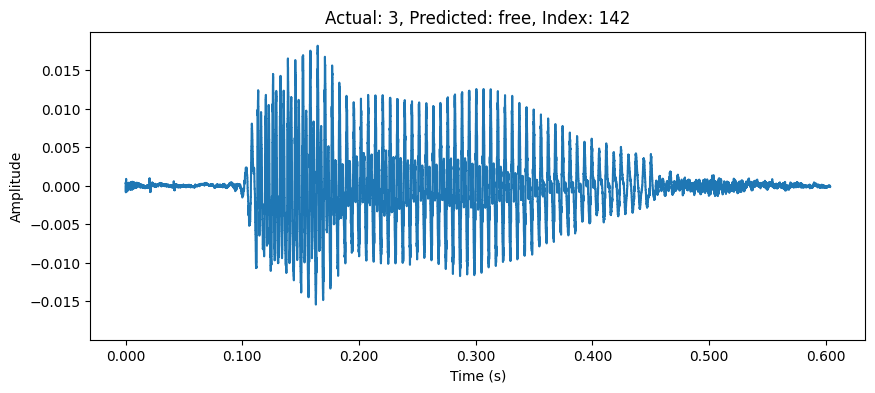

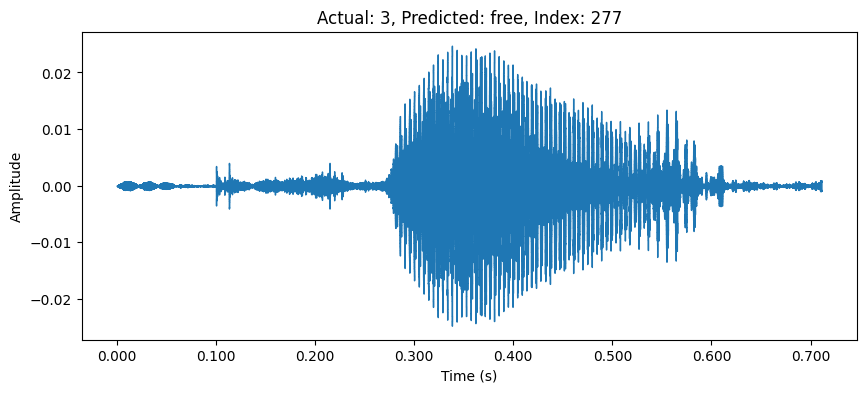

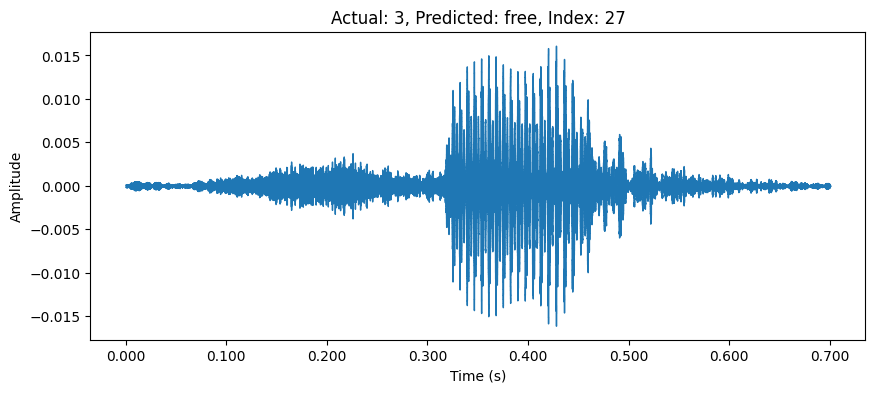

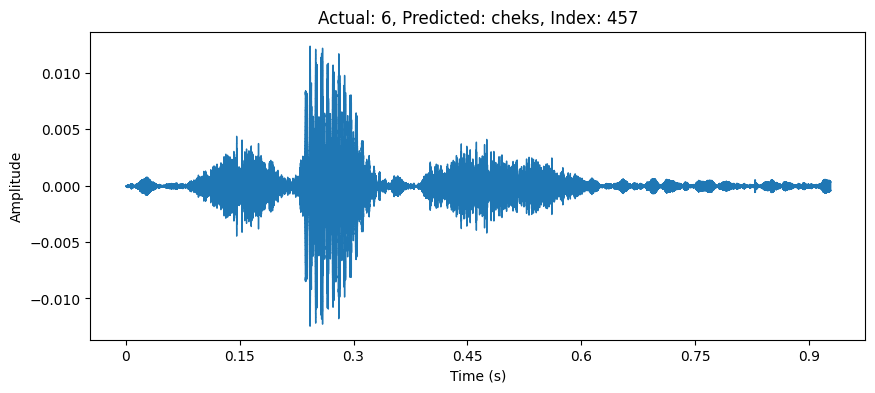

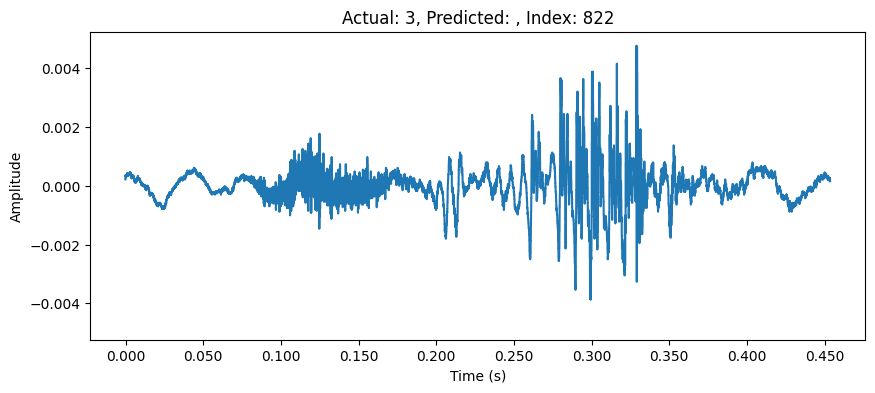

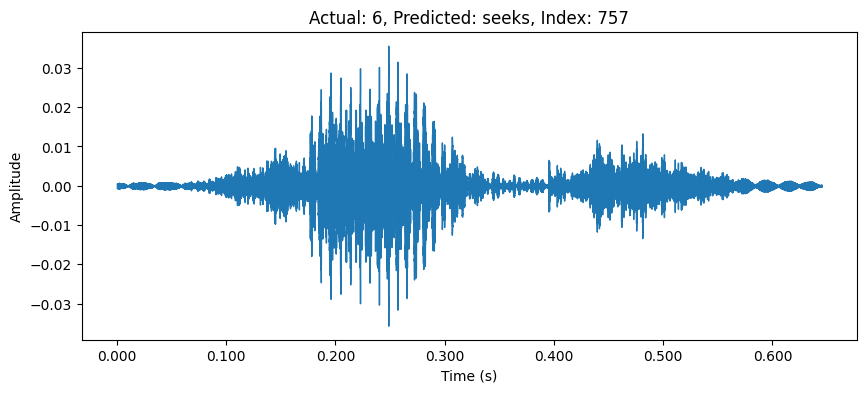

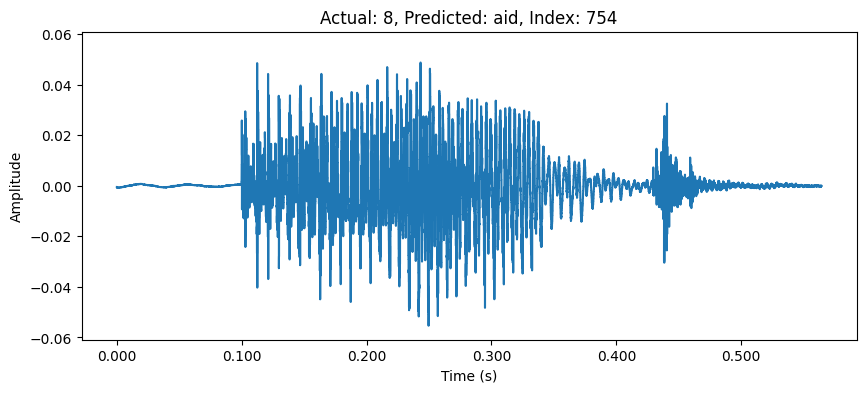

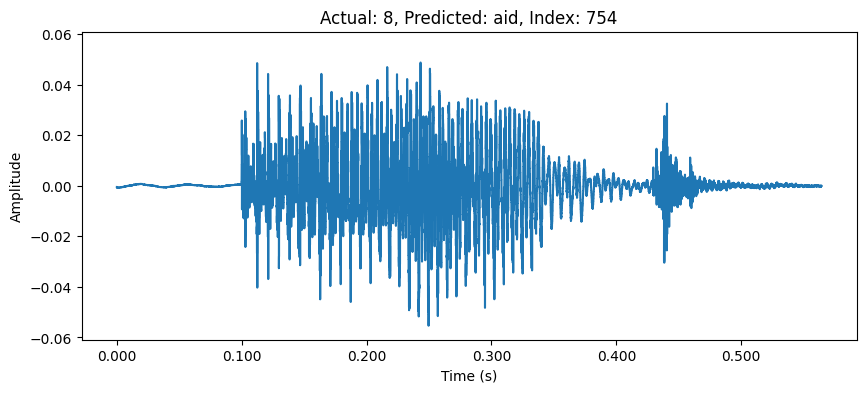

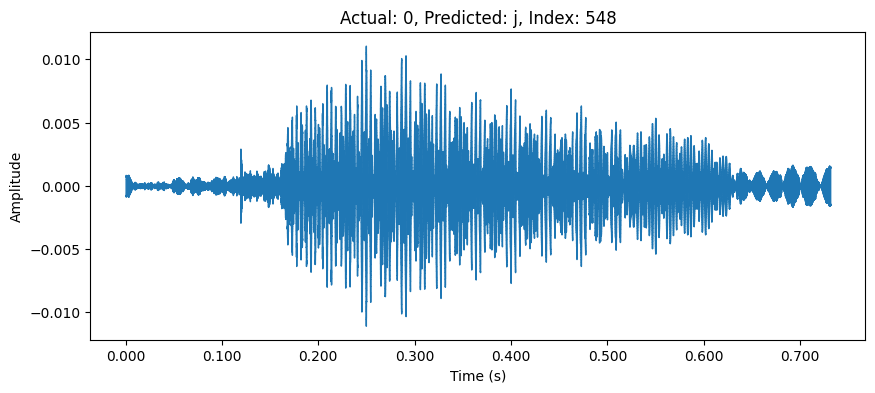

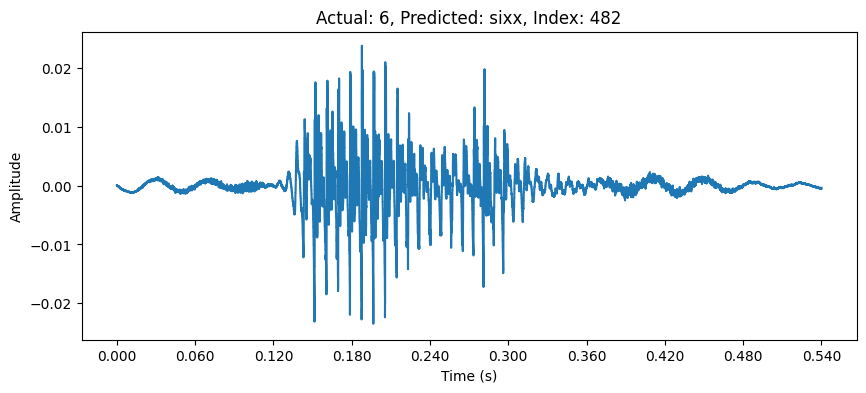

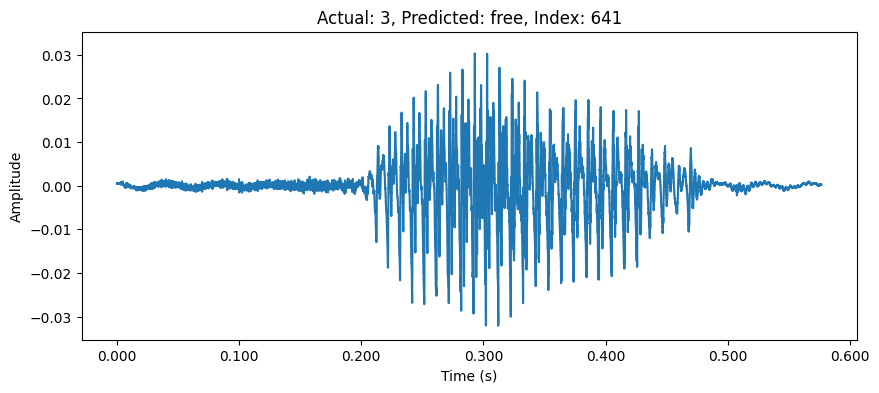

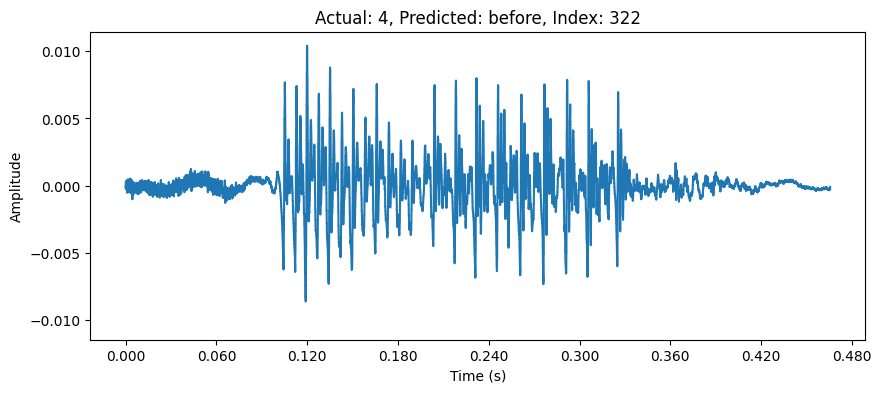

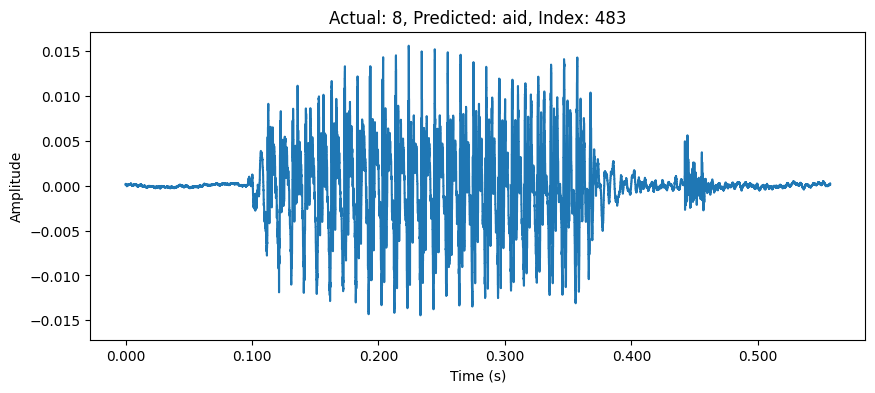

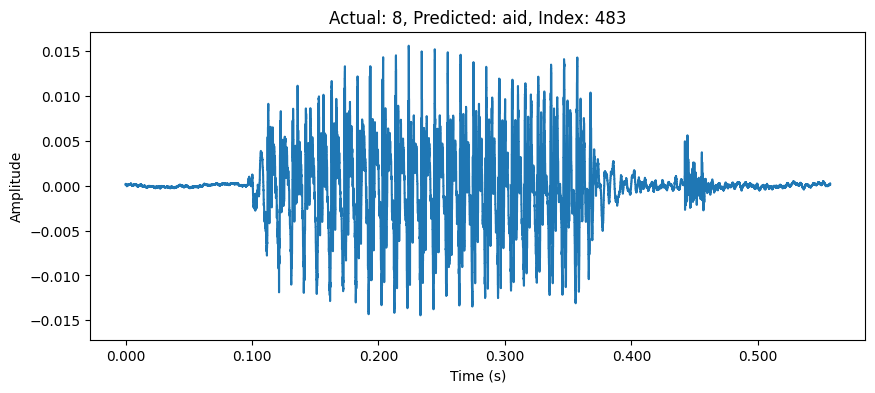

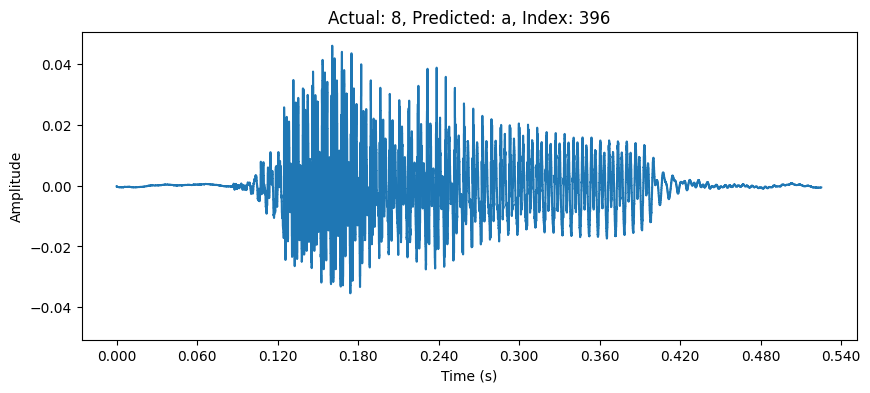

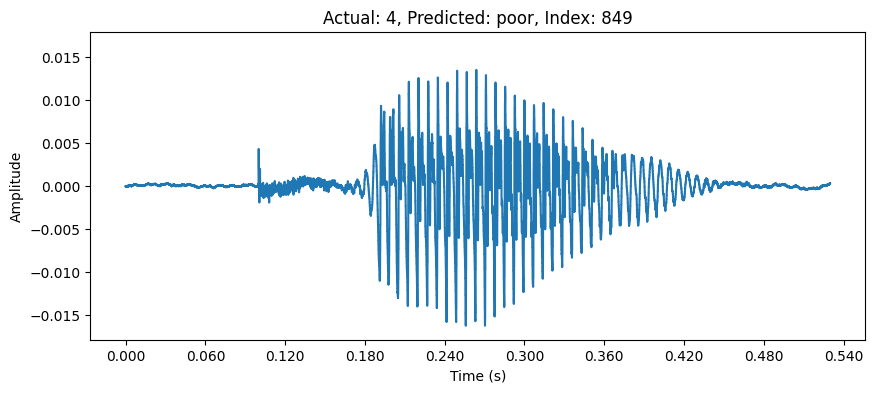

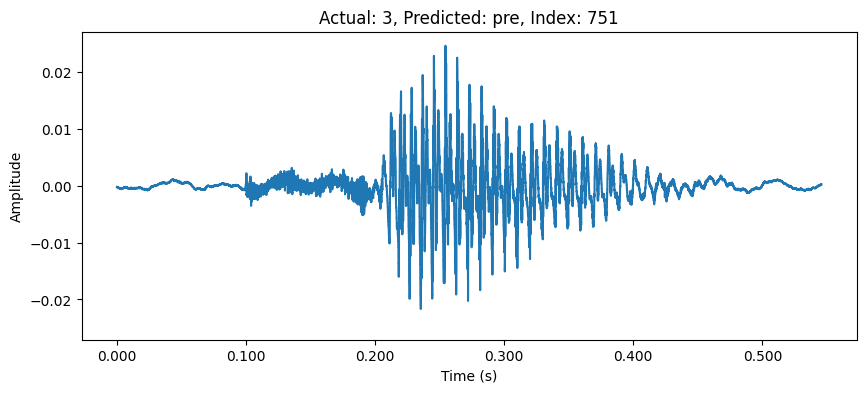

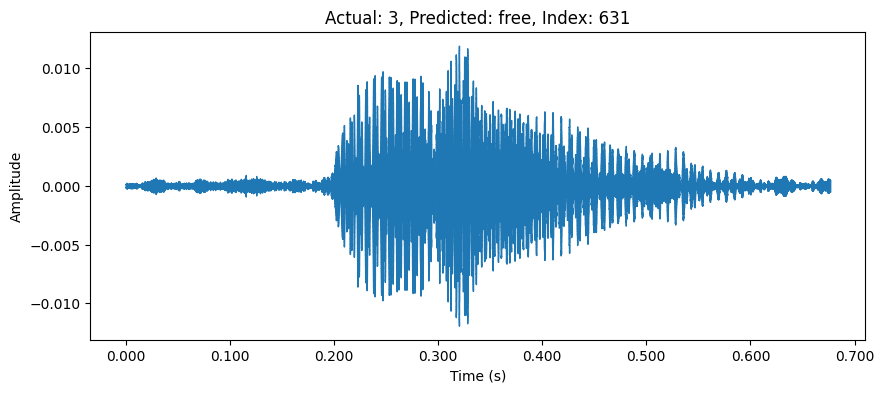

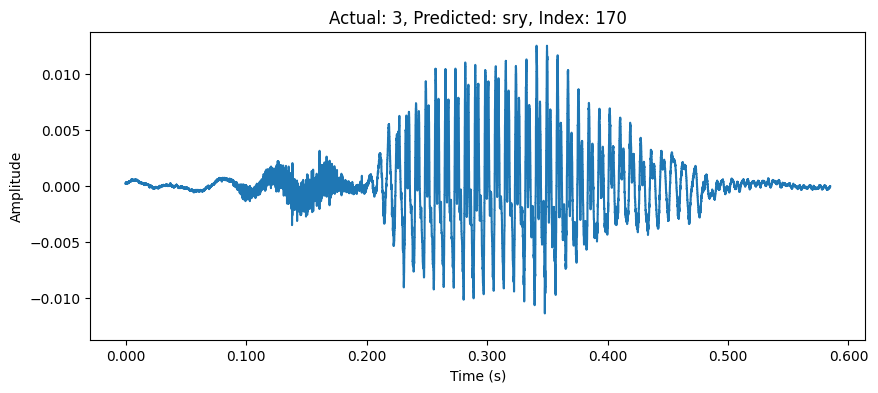

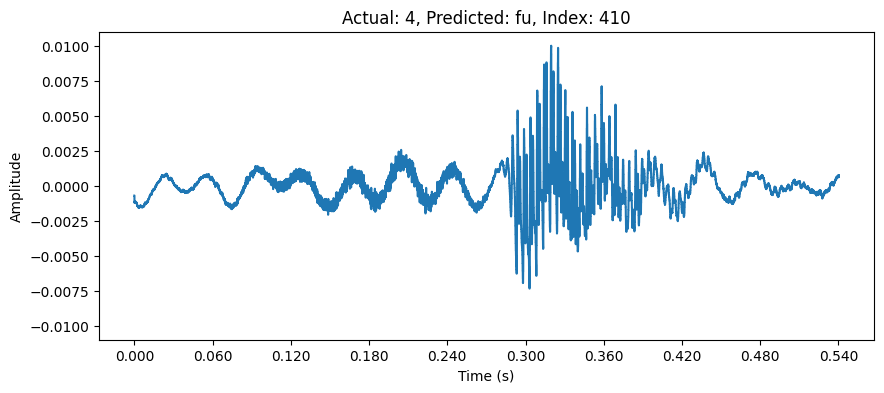

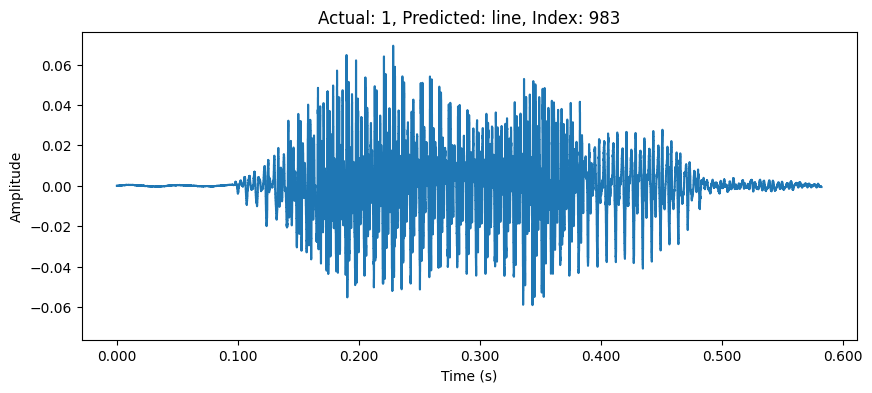

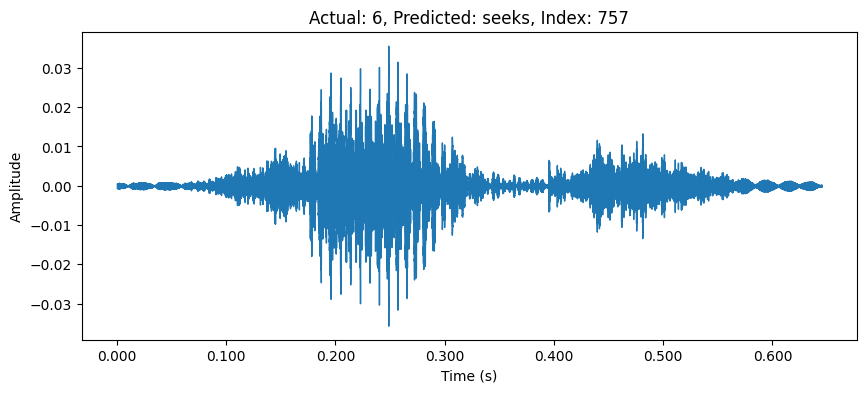

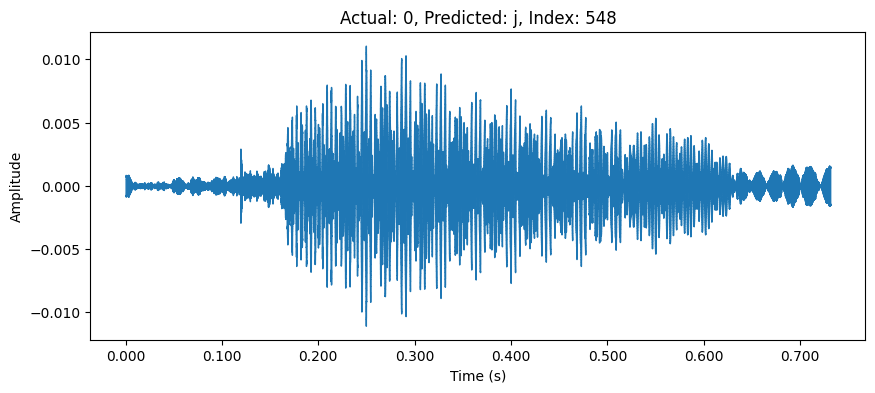

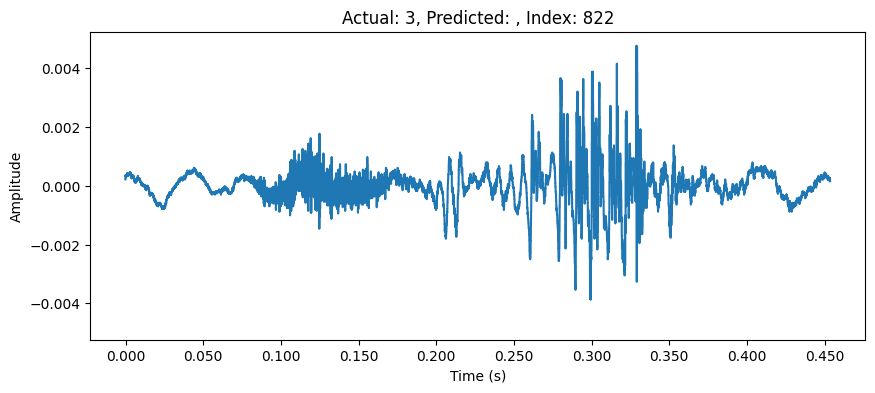

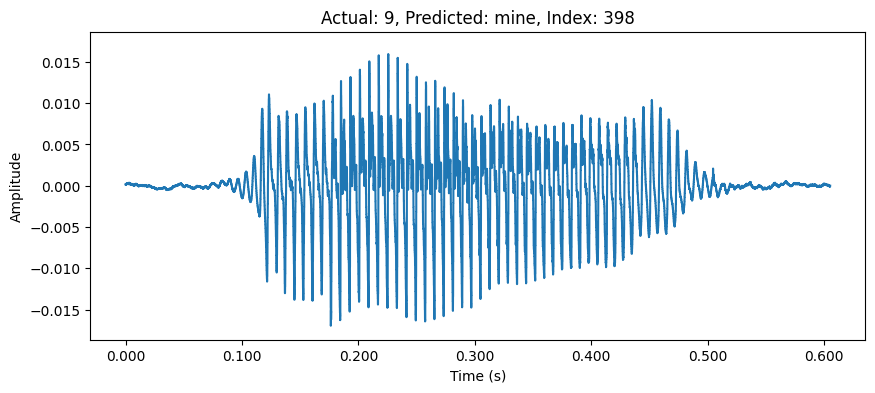

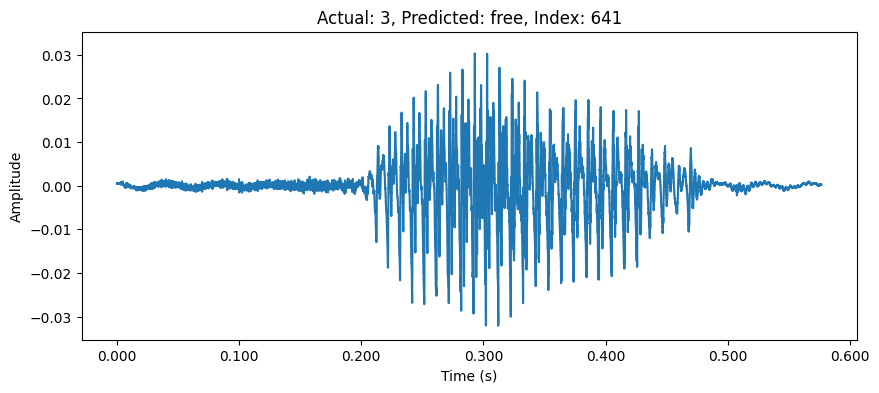

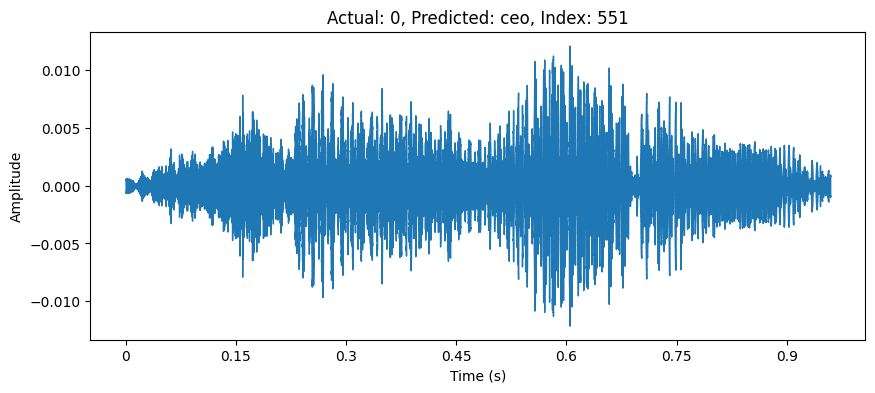

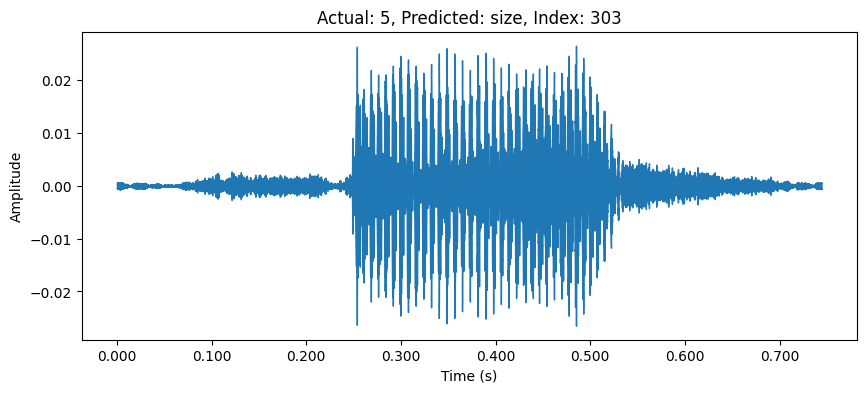

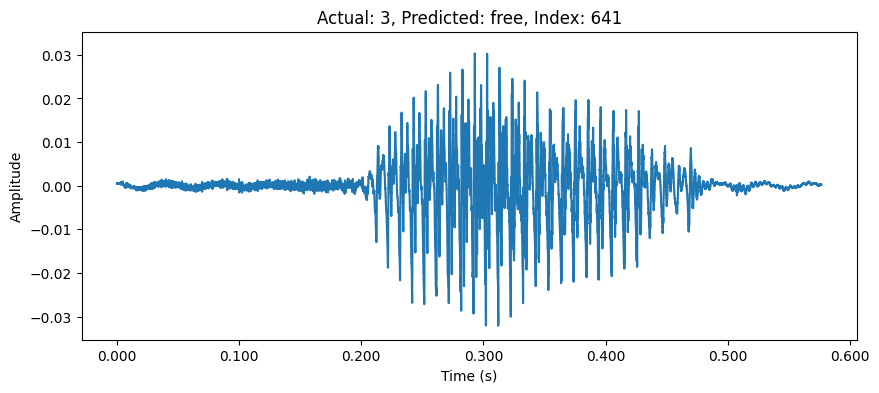

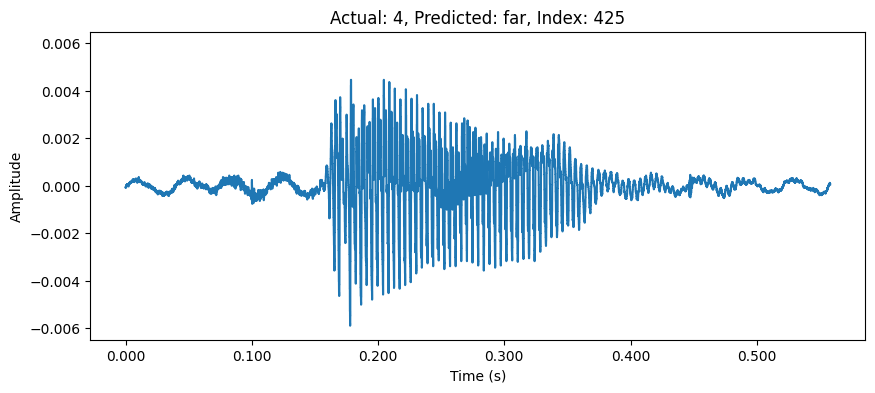

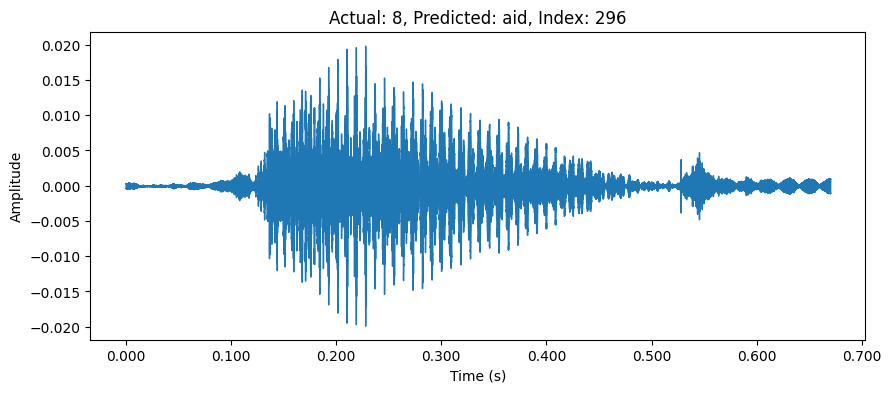

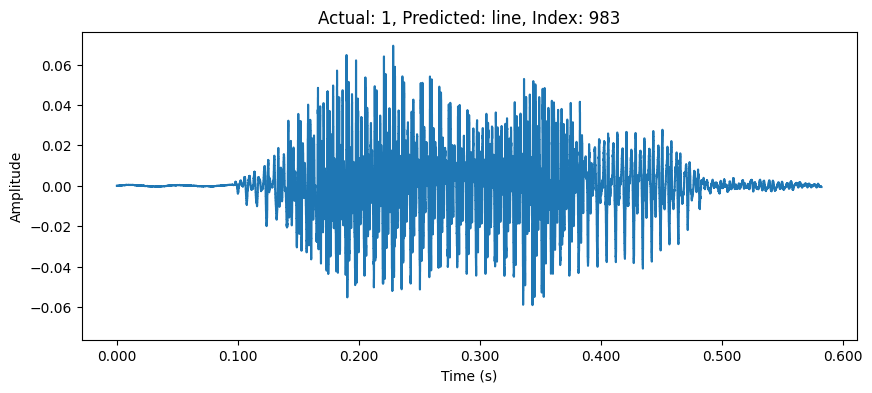

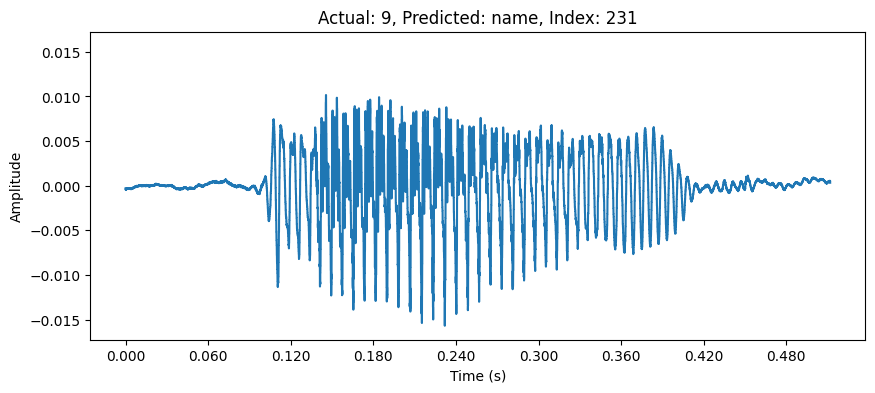

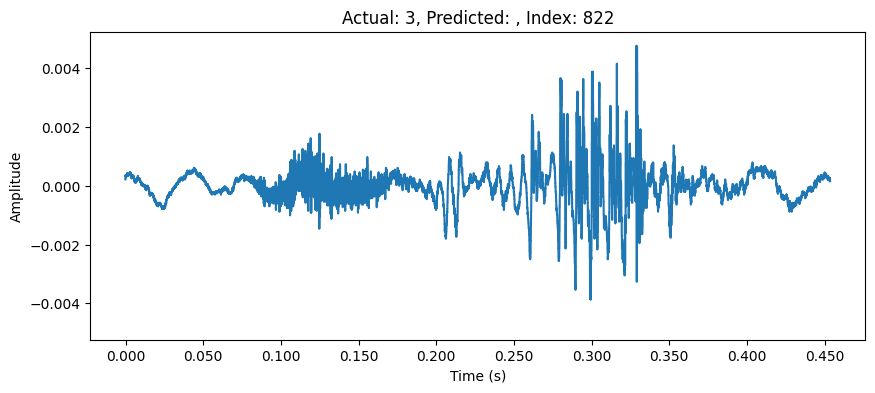

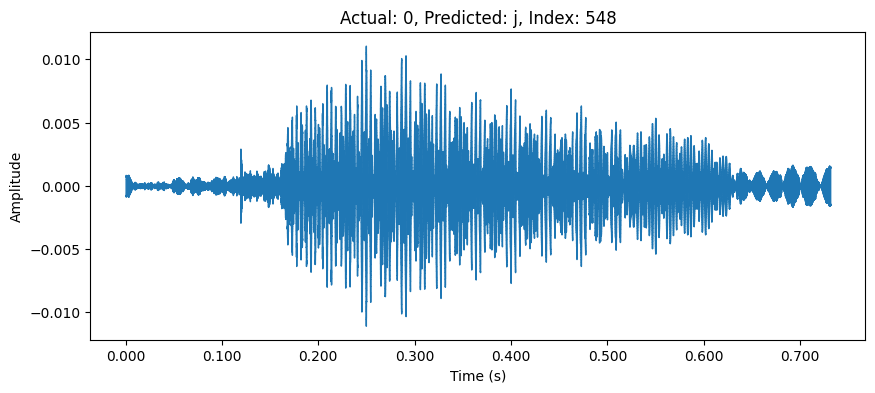

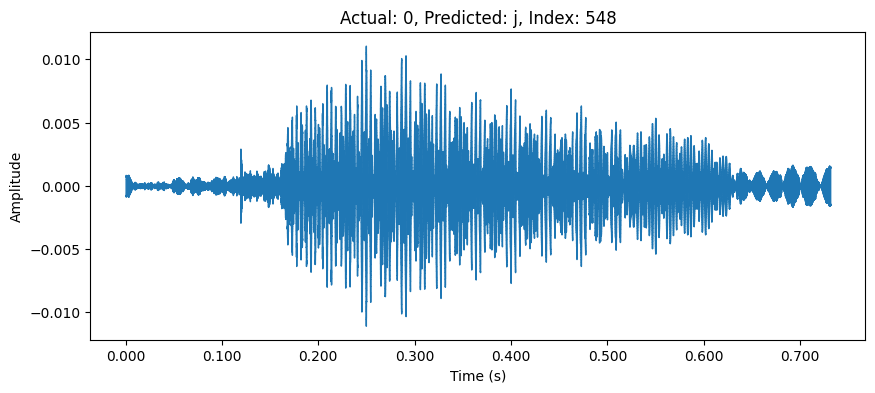

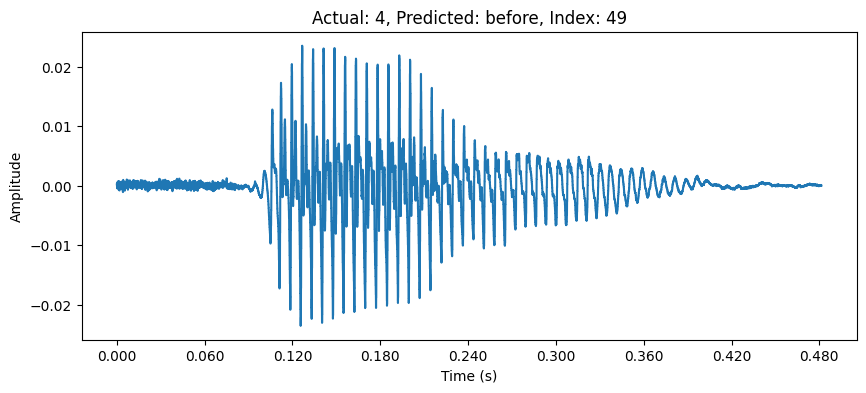

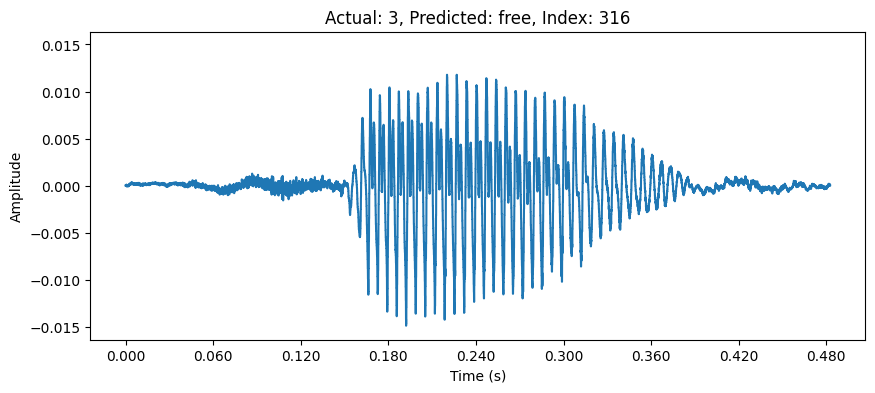

In [ ]:
def load_and_transcribe_audio(file_path):
    waveform, sample_rate = torchaudio.load(file_path)
    audio = waveform
    if audio.shape[1] < 16000:
        padding_size = 16000 - audio.shape[1]
        audio = torch.nn.functional.pad(audio, (0, padding_size), mode='constant', value=0.0)

    output = model(audio)
    transcription = ""
    for example in output:
        transcription += decoder(example.cpu())
    return waveform, transcription, sample_rate


random_entries = random.choices(misclassified_indices, k=50)
for i in random_entries:
    file_path = data_samples['file_paths'][i]
    actual_label = data_samples['actual_labels'][i]



    waveform, transcription, sample_rate = load_and_transcribe_audio(file_path)


    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(waveform.numpy()[0], sr=sample_rate)
    plt.title(f"Actual: {actual_label}, Predicted: {transcription.strip()}, Index: {i}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()
    display(Audio(file_path))

In [ ]:
# import os
# import torch
# import torchaudio

# correct_labels = []
# predicted_labels = []

# for i in range(len(data)):
#     filename = data['file_paths'][i]

#     label = filename.split('_')[0]  # Assuming label is the first part of the filename
#     correct_labels.append(data['actual_labels'][i])


#     waveform, sample_rate = torchaudio.load(filename)
#     audio = waveform
#     if audio.shape[1] < 16000:
#         padding_size = 16000 - audio.shape[1]
#         audio = torch.nn.functional.pad(audio, (0, padding_size), mode='constant', value=0.0)

#     output = model(audio)
#     transcription = ""
#     for example in output:
#         transcription += decoder(example.cpu())


#     predicted_label = transcription.strip()
#     predicted_label = convert_to_standard_format(predicted_label)
#     predicted_labels.append(predicted_label)


# correct_predictions = sum([pred == true for pred, true in zip(predicted_labels, correct_labels)])
# accuracy = correct_predictions / len(correct_labels)
# print(f"Accuracy: {accuracy * 100:.2f}%")

#Raw data, no changes to audio files

In [ ]:
parent_directory = '/content/drive/MyDrive/wav_files'
folders = [f for f in os.listdir(parent_directory) if os.path.isdir(os.path.join(parent_directory, f))]

all_wav_files_raw = []

for folder in folders:
    folder_path = os.path.join(parent_directory, folder)
    wav_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.wav')]
    all_wav_files_raw.extend(wav_files)

In [ ]:
data_raw = pd.DataFrame({'file_paths': all_wav_files_raw})

data_raw

file_paths
0       /content/drive/MyDrive/wav_files/56/2_56_0.wav
1       /content/drive/MyDrive/wav_files/56/1_56_4.wav
2      /content/drive/MyDrive/wav_files/56/0_56_35.wav
3      /content/drive/MyDrive/wav_files/56/1_56_41.wav
4      /content/drive/MyDrive/wav_files/56/0_56_34.wav
...                                                ...
29995  /content/drive/MyDrive/wav_files/50/7_50_38.wav
29996  /content/drive/MyDrive/wav_files/50/7_50_43.wav
29997  /content/drive/MyDrive/wav_files/50/9_50_37.wav
29998  /content/drive/MyDrive/wav_files/50/9_50_42.wav
29999  /content/drive/MyDrive/wav_files/50/9_50_34.wav

[30000 rows x 1 columns]

In [ ]:
rename = []
for i in range(data_raw['file_paths'].size):
  file_path = data_raw['file_paths'][i]
  rename.append(file_path[36])

data_raw['actual_labels'] = rename
data_raw

file_paths actual_labels
0       /content/drive/MyDrive/wav_files/56/2_56_0.wav             2
1       /content/drive/MyDrive/wav_files/56/1_56_4.wav             1
2      /content/drive/MyDrive/wav_files/56/0_56_35.wav             0
3      /content/drive/MyDrive/wav_files/56/1_56_41.wav             1
4      /content/drive/MyDrive/wav_files/56/0_56_34.wav             0
...                                                ...           ...
29995  /content/drive/MyDrive/wav_files/50/7_50_38.wav             7
29996  /content/drive/MyDrive/wav_files/50/7_50_43.wav             7
29997  /content/drive/MyDrive/wav_files/50/9_50_37.wav             9
29998  /content/drive/MyDrive/wav_files/50/9_50_42.wav             9
29999  /content/drive/MyDrive/wav_files/50/9_50_34.wav             9

[30000 rows x 2 columns]

In [ ]:
data_samples_raw = data_raw.sample(n=1000, random_state=42)
data_samples_raw.reset_index(drop=True, inplace=True)
data_samples_raw

file_paths actual_labels
0    /content/drive/MyDrive/wav_files/59/5_59_31.wav             5
1     /content/drive/MyDrive/wav_files/47/7_47_0.wav             7
2    /content/drive/MyDrive/wav_files/42/7_42_32.wav             7
3    /content/drive/MyDrive/wav_files/44/1_44_32.wav             1
4     /content/drive/MyDrive/wav_files/02/3_02_2.wav             3
..                                               ...           ...
995  /content/drive/MyDrive/wav_files/05/6_05_20.wav             6
996   /content/drive/MyDrive/wav_files/46/1_46_2.wav             1
997   /content/drive/MyDrive/wav_files/58/1_58_7.wav             1
998  /content/drive/MyDrive/wav_files/24/4_24_39.wav             4
999   /content/drive/MyDrive/wav_files/41/8_41_6.wav             8

[1000 rows x 2 columns]

In [ ]:
corrected_words = {
    "for" : "four",
    "to" : "two",
    "too" : "two"
}


correct_labels = []
predicted_labels = []
misclassified_indices = []

for i in range(len(data_samples_raw)):
    filename = data_samples_raw['file_paths'][i]
    correct_labels.append(data_samples_raw['actual_labels'][i])


    waveform, sample_rate = torchaudio.load(filename)
    audio = waveform
    if audio.shape[1] < 16000:
        padding_size = 16000 - audio.shape[1]
        audio = torch.nn.functional.pad(audio, (0, padding_size), mode='constant', value=0.0)


    output = model(audio)
    transcription = ""
    for example in output:
        transcription += decoder(example.cpu())


    predicted_label = transcription.strip()
    if(predicted_label in corrected_words):
      predicted_label = corrected_words[predicted_label]
    predicted_label = convert_to_standard_format(predicted_label)
    predicted_labels.append(predicted_label)
    if predicted_label != correct_labels[i]:
        misclassified_indices.append(i)


correct_predictions = sum([pred == true for pred, true in zip(predicted_labels, correct_labels)])
accuracy = correct_predictions / len(correct_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 0.00%
